In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pywt
from scipy.signal import chirp, spectrogram
from StoSpecRep.console import console
from StoSpecRep.waveletEPSD import CWTx

In [2]:
%matplotlib widget

In [3]:
%load_ext autoreload
%autoreload 2

# An example of a chirp signal

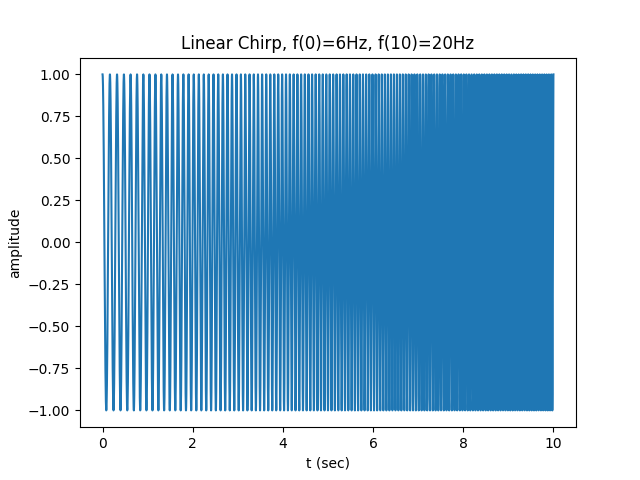

In [4]:
fig=plt.figure()
fs = 2000
duration = 10
# the total number N 
N = fs * duration
dt = 1/fs
t = np.linspace(0, duration, N)
w = chirp(t, f0=6, f1=20, t1=10, method='linear')
plt.plot(t, w)
plt.title("Linear Chirp, f(0)=6Hz, f(10)=20Hz")
plt.xlabel('t (sec)')
plt.ylabel('amplitude')
plt.show()

In [ ]:
len(w)

## EPSD estimation using `STFT`

In [ ]:
ff, tt, Sxx = spectrogram(w, fs=fs, nperseg=512, nfft=1024)

In [ ]:
console.print("Spectrogram shape:", Sxx.shape)

In [ ]:
ff.shape

In [ ]:
tt.shape

In [ ]:
# tweak a bit
fig=plt.figure()
plt.pcolormesh(tt, ff, Sxx, cmap='BuPu', shading='nearest')
plt.colorbar()
plt.ylim([0, 20])

In [ ]:
def plot_spectrogram(title, w, fs):
    """ self customized func for plotting spectrogram """
    
    ff, tt, Sxx = spectrogram(w, fs=fs, nperseg=2048, noverlap=512, nfft=2048)
    # plt.pcolormesh(tt, ff[:145], Sxx[:145], cmap='gray_r', shading='gouraud')
    plt.pcolormesh(tt, ff, Sxx, cmap='BuPu', shading='nearest')   # tweak with cmap and shading
    plt.title(title)
    plt.xlabel('t (sec)')
    plt.ylabel('Frequency (Hz)')
    plt.grid()

In [ ]:
fig=plt.figure()
plot_spectrogram(f'Quadratic Chirp by STFT', w, fs)
plt.ylim([0, 20])
plt.colorbar()
plt.show()

## EPSD estimation using `CWT`

Note that the coefficients are in the shape of `(length of given scales, length of input signal)` ==> `

In [5]:
demo_instance = CWTx(signal=w, fs=fs, t_axis=t)

In [6]:
demo_instance.check_scales(a=6, b=10, num=30)

scales_range(64.0, 1024.0) ==> FreqRange(low=1.5869140625, high=25.390625)

In [7]:
console.print(demo_instance.freqhelper(CWTx.goto_scales))

FreqRange(low=1.5869140625, high=406.25)

In [8]:
# propose scales to use
demo_instance.propose_scales(a=6, b=10, num=300)

In [9]:
# compute EPSD by wavelet transform
demo_instance.computeEPSD(demo_instance._proposed_scales)

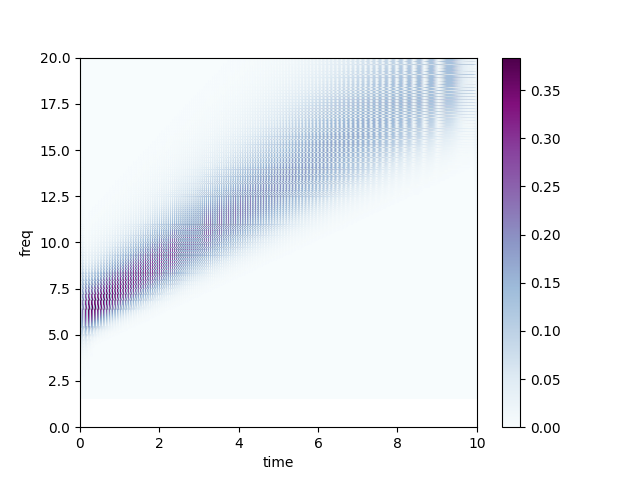

In [10]:
demo_instance.plot_waveletEPSD(option='2d')

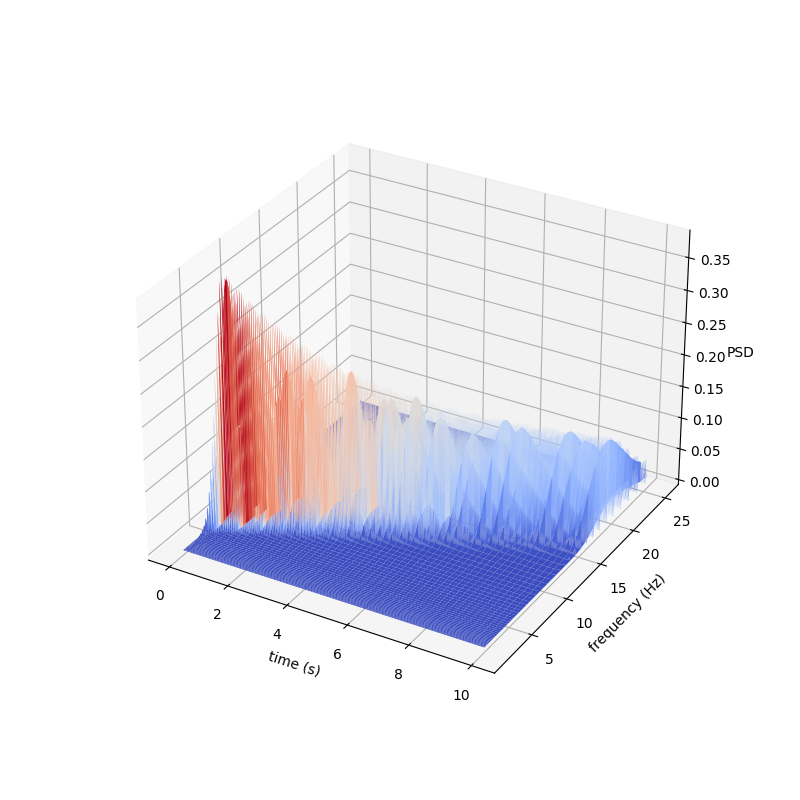

In [15]:
demo_instance.plot_waveletEPSD(option='3d')

#### old orginal code back up

Once set up the `scales` to use, we can then use CWT. Below shows the orginal raw code.
An abstracted version is put/used in the class

In [ ]:
# we need to propose scales to use
scales_of_interests = np.logspace(start=6, stop=10, num=300,  base=2, endpoint=True)

In [ ]:
coef, freqs = pywt.cwt(data=w, scales=scales_of_interests, wavelet='morl', sampling_period=dt)

In [ ]:
coef.shape

In [ ]:
# coef.shape
# t.shape  # columns, x-axis
# freqs.shape  # rows, y-axis frequencies

In [ ]:
### !!! Be careful of the coefficient ... 
pwr_coef = np.square(np.abs(coef)) * 2 * dt
print(pwr_coef.shape)

In [ ]:
# plt.matshow(coef) 
# plt.ylim(0, 200)
# plt.show()

In [ ]:
fig=plt.figure()
plt.pcolormesh(t, freqs, pwr_coef, cmap='BuPu', shading='gouraud')
plt.colorbar()
plt.ylim([0, 20])
plt.xlabel("time")
plt.ylabel("freq")
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,8))    
ax = plt.axes(projection='3d')

X, Y = np.meshgrid(t, freqs)
Z = pwr_coef

ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.set_xlabel('time (s)')
ax.set_ylabel('frequency (Hz)')
ax.set_zlabel('PSD')
# ax.set_ylim([0, 20])

# Another chirp example

In [ ]:
# Define signal
fs = 128.0
sampling_period = 1 / fs
t = np.linspace(0, 2, int(2 * fs)) # time only 2 seconds
x = chirp(t, f0=10, t1=2, f1=40, method='quadratic')

In [ ]:
plt.plot(t, x)

In [ ]:
# Calculate continuous wavelet transform
coef, freqs = pywt.cwt(x, np.arange(1, 50), 'morl',
                       sampling_period=sampling_period)

In [ ]:
freqs

In [ ]:
# Show w.r.t. time and frequency
plt.figure(figsize=(5, 2))
plt.pcolor(t, freqs, coef)

# Set yscale, ylim and labels
# plt.yscale('log')
# plt.ylim([1, 100])
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
# plt.savefig('egg.png', dpi=150)